# DATA OF TV,RADIO,NEWSPAPER ADVERTISING UNITS AND ITS CORRESPONDING SALES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Advertising.csv",index_col=0)
df

,TV,Radio,Newspaper,Sales
X1,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [5]:
x=TV
df.x

NameError: name 'TV' is not defined

In [10]:
df.TV

X1
1      230.1
2       44.5
3       17.2
4      151.5
5      180.8
       ...  
196     38.2
197     94.2
198    177.0
199    283.6
200    232.1
Name: TV, Length: 200, dtype: float64

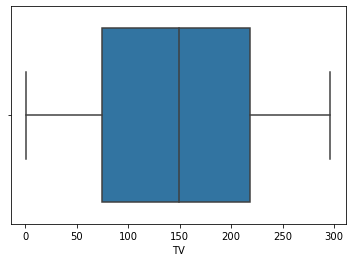

In [11]:
sns.boxplot(x="TV",data=df)
plt.show()

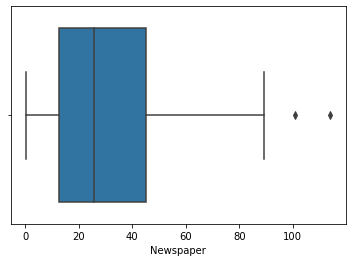

In [12]:
sns.boxplot(x="Newspaper",data=df)
plt.show()

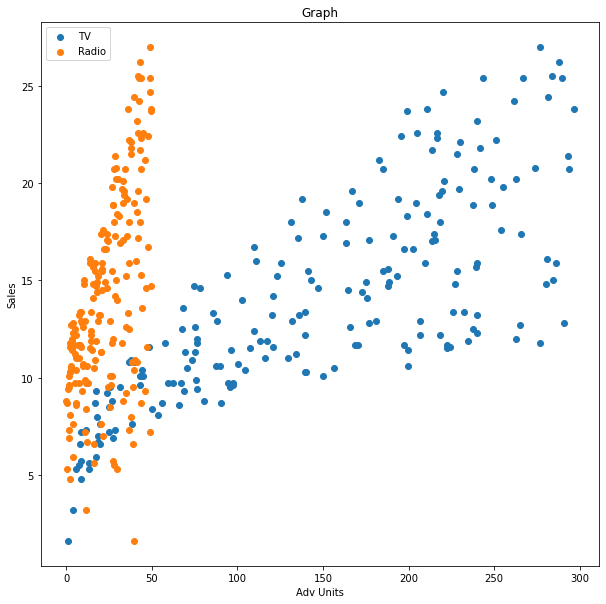

In [13]:
plt.figure(figsize=[10,10])
x1="TV"
y1="Sales"

x2="Radio"
y2="Sales"

plt.scatter(x1,y1,data=df,label="TV")
plt.scatter(x2,y2,data=df,label="Radio")

plt.legend()
plt.title("Graph")
plt.xlabel("Adv Units")
plt.ylabel("Sales")
plt.show()

In [14]:
%matplotlib inline

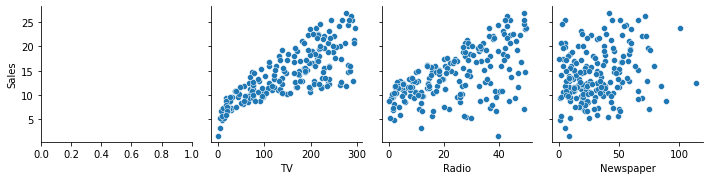

In [15]:
sns.pairplot(df, x_vars=["","TV","Radio","Newspaper"], y_vars= "Sales")
plt.show()

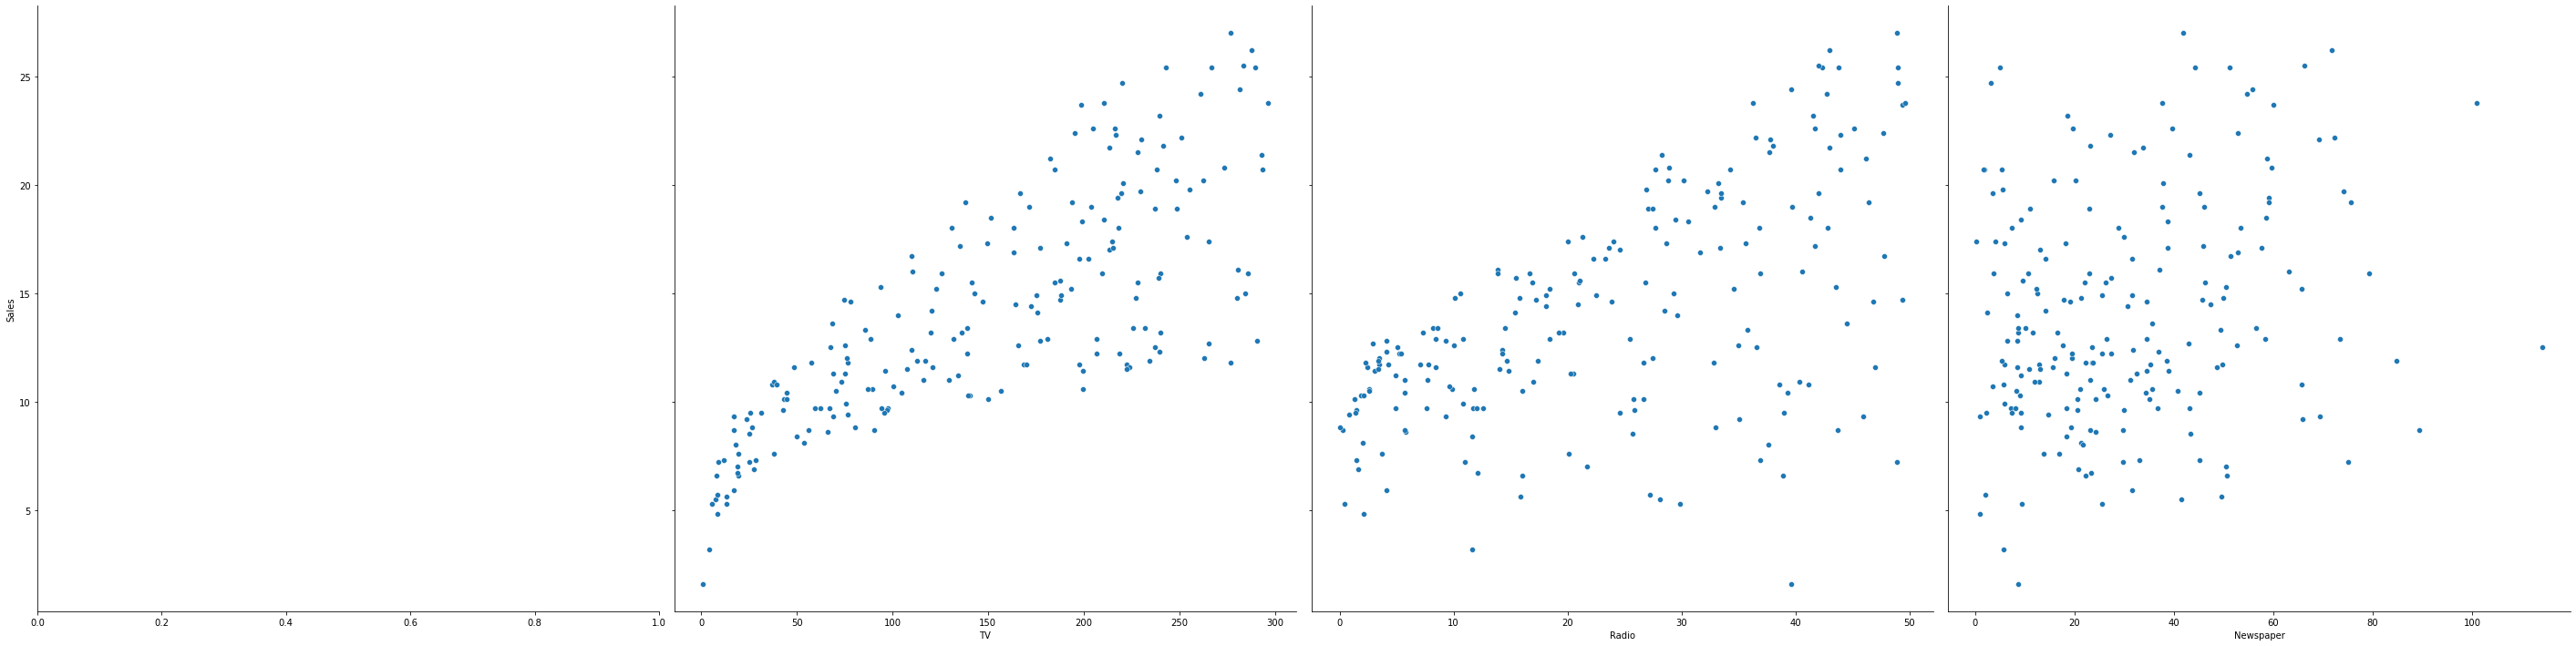

In [16]:
sns.pairplot(df, x_vars=["","TV","Radio","Newspaper"], y_vars= "Sales",height=10)
plt.show()

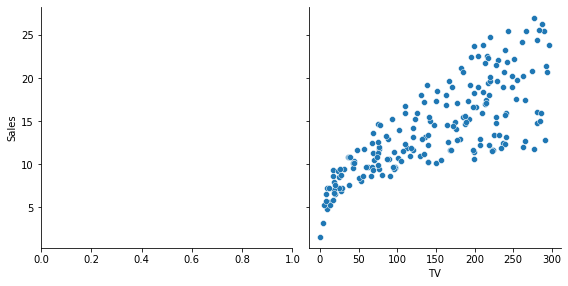

In [17]:
sns.pairplot(df, x_vars=["","TV"], y_vars= "Sales",height=4)
plt.show()

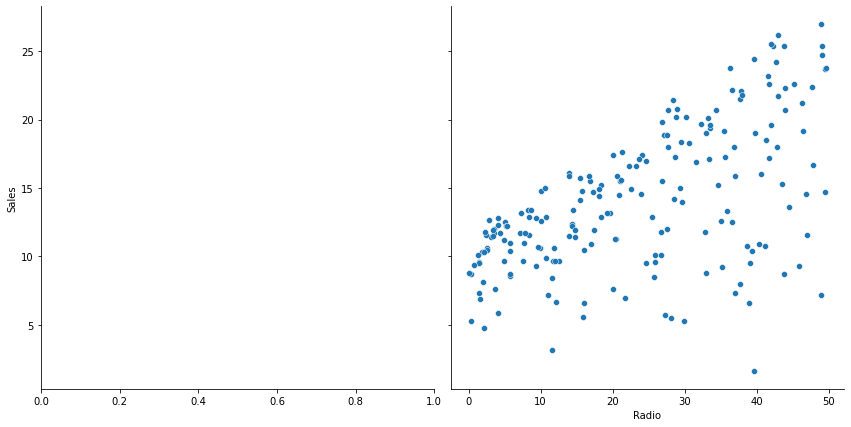

In [18]:
sns.pairplot(df, x_vars=["","Radio"], y_vars= "Sales",height=6)
plt.show()

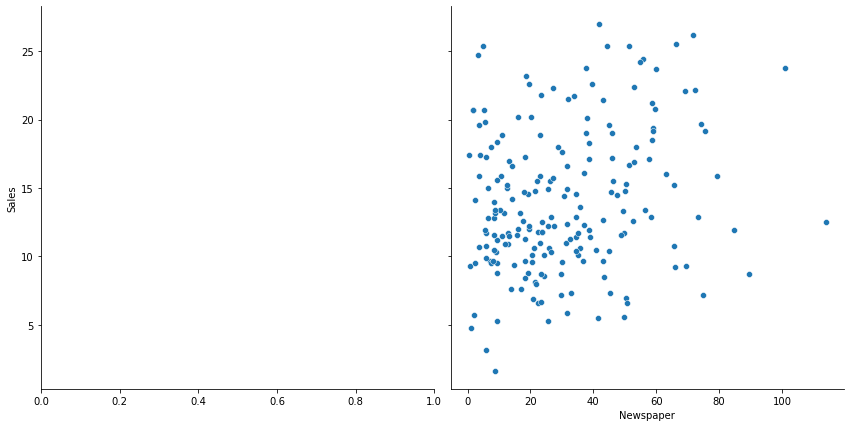

In [19]:
sns.pairplot(df, x_vars=["","Newspaper"], y_vars= "Sales",height=6)
plt.show()

In [20]:
corr_df=df.corr()
corr_df

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


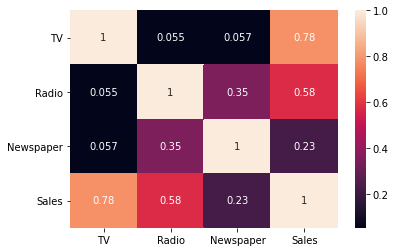

In [21]:
sns.heatmap(corr_df,annot=True)
plt.show()

In [22]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [23]:
feature_cols=["TV"]

x=df[feature_cols]
x

,TV
X1,
1,230.1
2,44.5
3,17.2
4,151.5
5,180.8
...,...
196,38.2
197,94.2
198,177.0


In [24]:
y=df["Sales"]
y

X1
1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: Sales, Length: 200, dtype: float64

# Splitting the data in Training and Testing sets

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123)

In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150,)
(50,)


In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
#initiate
linreg=LinearRegression()

In [30]:
#apply LR
linreg.fit(x_train,y_train)

LinearRegression()

In [31]:
linreg.intercept_

7.0321256400610315

In [32]:
linreg.coef_

array([0.04726633])

In [33]:
sales1=7.03 + (.047 * 147.3)
sales1

13.953100000000001

In [34]:
actual_val=14.6

In [35]:
error=actual_val - sales1
error

0.6468999999999987

In [36]:
y_pred=linreg.predict(x_test)
y_pred

array([16.4759376 , 10.822885  , 10.5629202 ,  9.14493042, 13.99445548,
       18.29096452, 14.85942925, 15.66295679, 15.93710148,  7.58514166,
       10.59128   , 16.7217225 ,  9.68849317,  7.91600594,  7.65131451,
       12.36849386, 15.5778774 , 20.11071808,  7.92073257, 17.35509127,
        7.95854563, 11.20574224,  7.87819288,  9.39544195, 17.44489729,
        8.29886318, 14.43403231, 13.78648364, 11.57914621, 17.26055861,
       12.51501947, 18.89124687, 20.62592103,  7.94909237, 16.16397985,
       17.42126412, 19.02831921, 15.77166934, 14.7507167 , 10.50147398,
        9.97681776, 20.29978338, 10.72835234, 19.58606186, 17.8230279 ,
       14.80743629, 15.39826536, 17.54415657, 16.37195168, 12.22196825])

In [37]:
y_test

X1
51     11.4
128     8.8
38     14.7
150    10.1
20     14.6
105    20.7
180    12.6
54     21.2
163    14.9
159     7.3
83     11.3
186    22.6
183     8.7
190     6.7
109     5.3
32     11.9
5      12.9
179    11.8
122     7.0
21     18.0
173     7.6
89     12.9
167     8.0
171     8.4
129    24.7
73      8.8
181    10.5
27     15.0
145    11.4
53     22.6
80     11.0
94     22.2
184    26.2
120     6.6
86     15.2
134    19.6
185    17.6
140    20.7
96     16.9
141    10.9
25      9.7
151    16.1
115    14.6
34     17.4
24     15.5
172    14.5
42     17.1
101    11.7
153    16.6
72     12.4
Name: Sales, dtype: float64

In [38]:
from sklearn import metrics

In [39]:
metrics.mean_absolute_error(y_test,y_pred)

2.2998620516177914

In [40]:
metrics.mean_squared_error(y_test,y_pred)

9.542934924756379

In [41]:
#root mean squared error
RMSE_MLR=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
RMSE_MLR

3.0891641142477972

# Verdict for Simple Linear Regression

My model will make an error of 3.09 unit while predicting the values of sales considering only TV as InV

In [215]:
 feature_col=["TV","Radio","Newspaper"]
 x=df[feature_col]
x

,TV,Radio,Newspaper
X1,,,
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4


In [217]:
y=df["Sales"]

In [218]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123)

In [219]:
linreg.fit(x_train,y_train)

LinearRegression()

In [222]:
print(linreg.intercept_)
print(linreg.coef_)

2.8432421471887928
[4.63372613e-02 1.85342809e-01 3.56953720e-05]


# Statistical way of executing Regression

In [43]:
import statsmodels.api as sm

In [65]:
#x=df[["TV","Radio","Newspaper"]]
x=df[["TV"]]
x

,TV
X1,
1,230.1
2,44.5
3,17.2
4,151.5
5,180.8
...,...
196,38.2
197,94.2
198,177.0


In [66]:
y=df["Sales"]
y

X1
1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: Sales, Length: 200, dtype: float64

In [73]:
linear_model=sm.OLS(y,x).fit()

In [68]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              1733.
Date:                Fri, 15 Oct 2021   Prob (F-statistic):                   3.52e-100
Time:                        18:37:51   Log-Likelihood:                         -597.51
No. Observations:                 200   AIC:                                      1197.
Df Residuals:                     199   BIC:                                      1200.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0832      0.002     41.633      0.000       0.079       0.087
==============================================================================
Omnibus:                       20.228   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.930
Skew:                          -0.846   Prob(JB):                     6.36e-06
Kurtosis:                       3.086   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
x=df[["TV","Radio","Newspaper"]]
x

,TV,Radio,Newspaper
X1,,,
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4


In [70]:
y=df["Sales"]
y

X1
1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: Sales, Length: 200, dtype: float64

In [74]:
linear_model=sm.OLS(y,x).fit()

In [75]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Fri, 15 Oct 2021   Prob (F-statistic):                   2.43e-171
Time:                        18:48:55   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
Radio          0.2222      0.009     23.595      0.000       0.204       0.241
Newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""